In [1]:
import numpy as np

In [2]:
def original_function(x):
    return np.sin(x) + 0.3 * x**2

In [3]:
def noised_original_function(x):
    return original_function(x) + 0.2 * np.sin(1001*x)

In [4]:
def wendland(x, y):
    r = abs(x-y)/1.5
    ans = (1-r)**5 * (8*r**2+5*r+1)
    return (abs(ans) + ans) / 2

In [5]:
def quasi_interpolate(samples, data, kernel):
    def result(x):
        weights = [kernel(x, x_i) for x_i in samples]
        normalizer = sum(weights)
        return sum(w_i * d_i for w_i, d_i in zip(weights, data)) / normalizer
    return result

In [6]:
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 

x = np.linspace(-3, 3, num=16, endpoint=True)
y = original_function(x)
yn = noised_original_function(x)
f = interp1d(x, yn)
f2 = interp1d(x, yn, kind='cubic')
f3 = quasi_interpolate(x, yn, wendland)

xnew = np.linspace(-3, 3, num=41, endpoint=True)

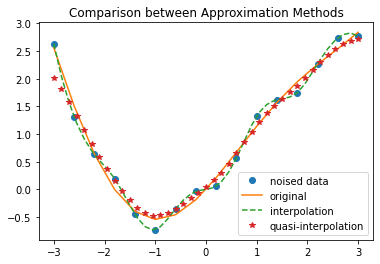

In [7]:
plt.plot(x, yn, 'o', x, y, '-', xnew, f2(xnew), '--', xnew, f3(xnew), '*')
plt.legend(['noised data', 'original', 'interpolation', 'quasi-interpolation'], loc='best')
plt.title('Comparison between Approximation Methods')
plt.show()

In [8]:
print(f"Interpolation Error: {np.sqrt(np.mean((f2(xnew) - original_function(xnew))**2))}"
      "\n"
      f"Quasi Interpolation Error: {np.sqrt(np.mean((f3(xnew) - original_function(xnew))**2))}")

Interpolation Error: 0.1370739221379782
Quasi Interpolation Error: 0.12792628024482594


In [9]:
samples_points = [0.4 * t - 3 for t in range(5)]

In [10]:
data = [original_function(x) for x in samples_points]

In [11]:
from numpy import linalg as la

def interpolate(samples, points, kernel):
    samples = np.array(samples)
    kernel_matrix = np.array([[kernel(x_i, x_j) for x_j in points] for x_i in points])
    print(kernel_matrix)
    coefficients = np.matmul(la.inv(kernel_matrix), samples)
    print(coefficients)
    
    def result_function(x):
        return sum(b_j * kernel(x, x_j) for b_j, x_j in zip(coefficients, points))
    return result_function